<a href="https://colab.research.google.com/github/hws2002/Deep_Learning_with_Keras/blob/main/Chapter8/Chapter8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 작은 데이터셋에서 밑바닥부터 컨브넷 훈련하기

5000개의 강아지와 고양이 사진(equally distributed)으로 구성된 데이터셋에서 강아지와 고양이 이미지를 분류해 보자.  

2000개의 사진을 사용하고 검증에 1000개와 테스트에 2000개의 사진을 사용해보자  

## 구글 코랩에서 캐글 데이터셋 내려받기

https://www.kaggle.com/c/dogs-vs-cats/data  
이 데이터셋은 2만5000개의 강아지와 고양이 이미지(클래스마다 1만 2500개)를 담고 있고 (압축해서) 543mb크기임.  
데이터를 내려받아 압축을 해제한 후 3개의 서브셋이 들어 있는 새로운 데이터셋을 만들 것임.  
클래스마다 1,000개의 샘플로 이루어진 훈련 세트, 클래스마다 500개의 샘플로 이루어진 검증 세트, 클래스마다 1000개의 샘플로 이루어진 테스트 셋



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Colab\ Notebooks/DEEP_LEARNING_KERAS/Chapter8/train.zip -d /content/

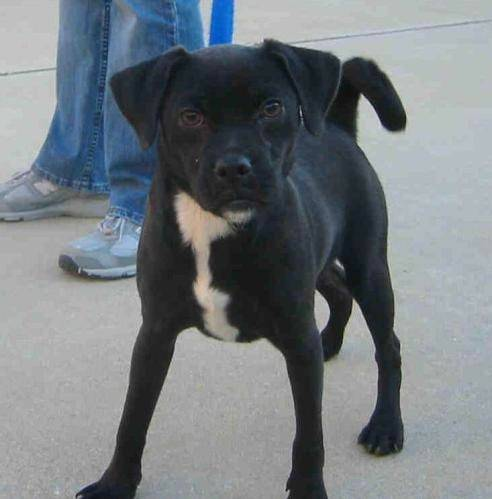

In [ ]:
from IPython.display import Image, display

image_path = 'train/dog.56.jpg'
display(Image(image_path))

In [ ]:
import os, shutil, pathlib
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")
def make_subset(subset_name, start_index, end_index):

  for category in ('cat', 'dog'):
    dir = new_base_dir / subset_name / category

    if dir.exists(): # 이미 해당 파일이 존재한다면 삭제한다 (덮어씌우기)
      shutil.rmtree(dir)

    os.makedirs(dir)
    fnames = [f"{category}.{i}.jpg"
             for i in range(start_index, end_index)]

    for fname in fnames:
      shutil.copyfile(src = original_dir / fname,
                      dst = dir / fname)


make_subset("train",0,1000)
make_subset("validation",1000,1500)
make_subset("test",1500,2500)


# 모델 만들기

첫 번째 예제에서 보았던 일반적인 모델 구조를 동일하게 재사용해보겠다.  

Conv2D(relu 활성화 함수 사용)와 MaxPooling2D 층을 번갈아 쌓은 컨브넷임.

In [ ]:
from PIL import Image
import numpy as np

image_path = 'cats_vs_dogs_small/train/dog/dog.5.jpg'
image = Image.open(image_path)

image_array = np.array(image)

image_array.shape

(376, 499, 3)

In [ ]:
import keras
from keras import layers

inputs = keras.Input((180, 180, 3)) # 임의로 선택한 크기
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters = 32,  kernel_size = 3, activation = 'relu')(inputs)
x = layers.MaxPooling2D(pool_size = 2)(x)

x = layers.Conv2D(filters = 64,  kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)

x = layers.Conv2D(filters = 128,  kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)

x = layers.Conv2D(filters = 256,  kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)

x = layers.Conv2D(filters = 256,  kernel_size = 3, activation = 'relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)

model = keras.Model(inputs = inputs, outputs = outputs)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 컴파일 단계
model.compile(
    optimizer = "rmsprop",
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])

# 데이터 전처리
1. 사진 파일을 읽고
2. JPEG 컨텐츠를 RGB 픽셀 값으로 디코딩함
3. 그다음 부동 소수점 타입의 텐서로 변환
4. 동일한 크기의 이미지로 바꿈 (여기에서는 180 x 180을 선택함)
5. 배치로 묶음(하나의 배치에 32개의 이미지)

## image_dataset_from_directory를 사용하여 이미지 읽기

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size = (180,180),
    batch_size = 32
)

validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size = (180,180),
    batch_size = 32
)

test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size = (180,180),
    batch_size = 32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


이 Dataset 객체의 출력 하나를 살펴보면, 180 x 180 RGB 이미지의 배치((32, 180, 180, 3) 크기)와 정수 레이블의 배치((32,) 크기)임. 각 배치에는 32개의 샘플(배치 크기)이 있음

In [ ]:
for data_batch, labels_batch in train_dataset:
  print("데이터 배치 크기 : ", data_batch.shape)
  print("레이블 배치 크기 : ", labels_batch.shape)
  break

데이터 배치 크기 :  (32, 180, 180, 3)
레이블 배치 크기 :  (32,)


이 데이터셋에서 모델을 훈련해 보자 fit() 메서드의 validation_data 매개변수를 사용하여 별도의 Dataset 객체로 검증 지표를 모니터링해보자  

또한, ModelCheckPoint 콜백을 사용하여 에포크가 끝날 때마다 모델을 저장해보자. 콜백에 파일을 저장할 경로와 매개변수 save_best_only = True와 monitor = "val_loss"를 지정할 것임.  
이러면 훈련하는 동안 val_loss 값이 이전보다 더 낮을 때만 콜백이 (이전 파일을 덮어 쓰는 식으로) 새로운 파일을 저장할 것이고, 저장된 파일에는 언제나 검증 데이터의 성능이 가장 좋은 훈련 에포크의 모델 상태가 들어 있게 됨.  




In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint( # 매 에포크 끝에서 현재 가중치를 저장함
        filepath = "convnet_from_scratch.keras",
        save_best_only = True,
        monitor = "val_loss"
    )
]

history = model.fit(
    train_dataset,
    epochs = 30,
    validation_data = validation_dataset,
    callbacks = callbacks
)

훈련 데이터와 검증 데이터에 대한 모델의 손실과 정확도를 그래프로 나타내 보자

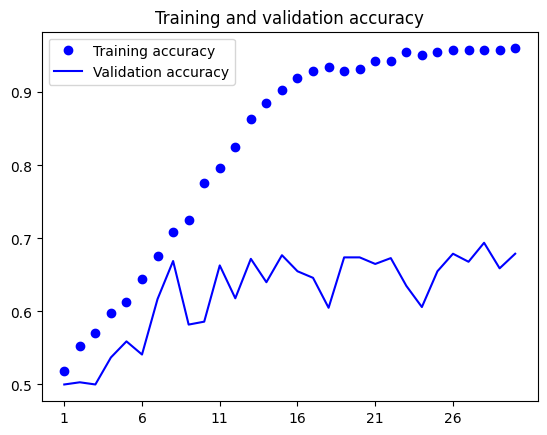

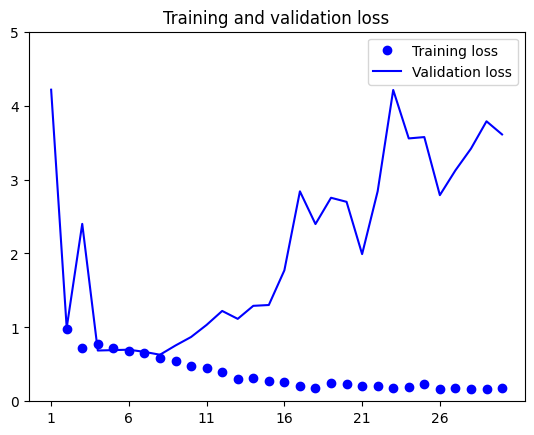

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title("Training and validation accuracy")
plt.xticks(range(1,31,5), range(1, len(loss)+1, 5))

plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.ylim(0, 5)
plt.xticks(range(1,31,5), range(1, len(loss)+1, 5))
plt.title("Training and validation loss")
plt.legend()
plt.show()

이 그래프는 과대적합의 특성을 보여 줌.  
훈련 정확도가 시간이 지남에 따라 선형적으로 증가해서 거의 100%에 도달함  
반면 검증 정확도는 75%가 최고임.  

검증 손실은 열 번의 에포크 만에 최솟값에 다다른 이후 더 이상 진전되지 않음.  
반면 훈련 손실은 훈련이 진행됨에 따라 선형적으로 계속 감소함.  

## 테스트 세트에서 모델 평가하기

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_accuracy = test_model.evaluate(test_dataset)
print(f"테스트 정확도 : {test_accuracy:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6433 - loss: 0.6675
테스트 정확도 : 0.650


비교적 훈련 샘플의 개수가 적기 때문에 과대적합이 가장 중요한 문제임. 드롭아웃이나 가중치 감소(L2 규제)처럼 과대적합을 감소시킬 수 있는 여러 가지 기법을 배웠기 때문에, 컴퓨터 비전에 특화되어 있어 딥러닝으로 이미지를 다룰 때 매우 일반적으로 사용되는 데이터 증식을 시도해 보자.  


# 데이터 증식 사용하기

컨브넷의 Rescaling 층 바로 이전에 이 모델을 추가해 보자.

In [ ]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])

(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)


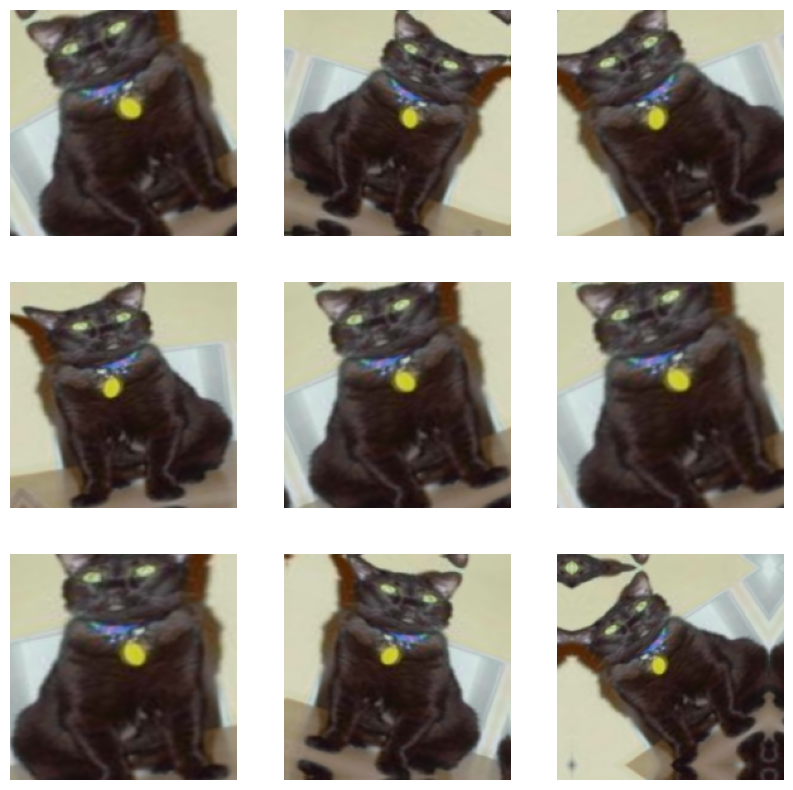

In [ ]:
plt.figure(figsize = (10,10))
for images, _ in train_dataset.take(1): # take(N)을 사용하여 데이터셋에서 N개의 배치만 샘플링함
                                      # 이는 N번째 배치 후에 루프를 중단하는 것과 같음
    for i in range(9):
      augmented_images = data_augmentation(images) # 배치 이미지에 데이터 증식을 적용함
      ax = plt.subplot(3,3,i+1)
      plt.imshow(augmented_images[0].numpy().astype("uint8")) # 배치 출력에서 첫 번째 이미지를 출력함
      plt.axis("off")

In [ ]:
inputs = keras.Input(shape = (180,180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)

x = layers.Conv2D(filters = 32,  kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)

x = layers.Conv2D(filters = 64,  kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)

x = layers.Conv2D(filters = 128,  kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)

x = layers.Conv2D(filters = 256,  kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)

x = layers.Conv2D(filters = 256,  kernel_size = 3, activation = 'relu')(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)

model = keras.Model(inputs = inputs, outputs = outputs)

In [ ]:
# 컴파일 단계
model.compile(
    optimizer = "rmsprop",
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])

데이터 증식과 드롭아웃을 사용해서 모델을 훈련해 보자  
훈련에서 과대적합이 훨씬 늦게 일어날 것으로 기대되기 때문에 3배 많은 100에포크 동안 훈련해보자  


In [ ]:
# 데이터 증식과 드롭아웃을 사용해서 모델을 훈련해 보자
callbacks = [
    keras.callbacks.ModelCheckpoint( # 매 에포크 끝에서 현재 가중치를 저장함
        filepath = "convnet_from_scratch_with_augmentation.keras",
        save_best_only = True,
        monitor = "val_loss"
    )
]

history = model.fit(
    train_dataset,
    epochs = 100,
    validation_data = validation_dataset,
    callbacks = callbacks
)

결과를 그래프로 살펴보자

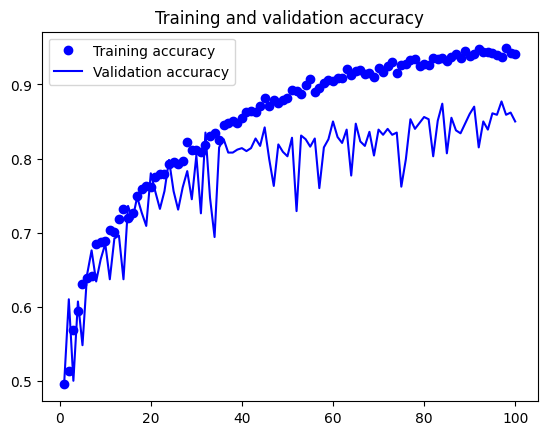

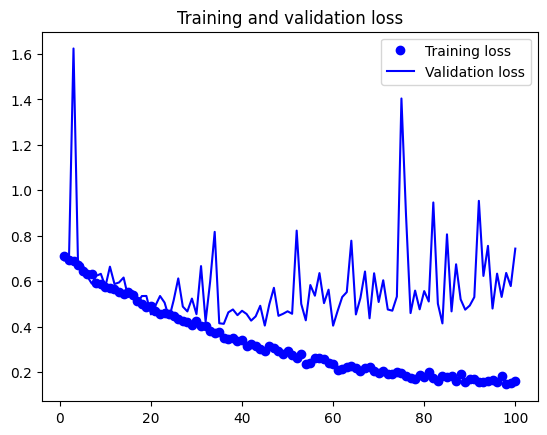

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title("Training and validation accuracy")
# plt.xticks(range(1,31,5), range(1, len(loss)+1, 5))

plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
# plt.xticks(range(1,31,5), range(1, len(loss)+1, 5))
plt.title("Training and validation loss")
plt.legend()
plt.show()

데이터 증식과 드롭아웃 덕부네 과대적합이 훨씬 늦은 60~70번째 에포크 근처에서 시작되었음을 알 수 있음.  
검증 정확도는 80 ~ 85%범위에서 유지됨.  
이전 모델보다 훨씬 성능이 좋아짐.

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras"
)

test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도 : {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8414 - loss: 0.4749
테스트 정확도 : 0.845
